In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib


In [156]:
data=pd.read_csv('/content/drive/MyDrive/content/archive (5)/salary_data_cleaned.csv')

In [157]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [158]:
len(data['Job Title'].unique())

264

In [159]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [160]:
data['job_state'].unique()
data['job_state'].replace({' Los Angeles':' LA'},inplace=True)

In [161]:
top_5=['CA','NY','VA','AZ','DC']
others=['']

In [162]:
data['job_state'].unique()

array([' NM', ' MD', ' FL', ' WA', ' NY', ' TX', ' CA', ' VA', ' MA',
       ' NJ', ' CO', ' IL', ' KY', ' OR', ' CT', ' MI', ' DC', ' OH',
       ' AL', ' MO', ' PA', ' GA', ' IN', ' LA', ' WI', ' NC', ' AZ',
       ' NE', ' MN', ' UT', ' TN', ' DE', ' ID', ' RI', ' IA', ' SC',
       ' KS'], dtype=object)

In [163]:
data['job_state']=data['job_state'].map(lambda x: x.strip())

In [164]:
data['Type of ownership'].unique()

array(['Company - Private', 'Other Organization', 'Government',
       'Company - Public', 'Hospital', 'Subsidiary or Business Segment',
       'Nonprofit Organization', 'Unknown', 'College / University',
       'School / School District', '-1'], dtype=object)

In [165]:
data['Type of ownership']=data['Type of ownership'].replace({"Company - Private":'Private','Company - Public':'Public','Subsidiary or Business Segment':'Business','College / University':'c&s','School / School District':'c&s'})

In [166]:
data['Type of ownership']=np.where(np.isin(data['Type of ownership'],['Private','Business','Public','Government']),data['Type of ownership'], 'other')

In [167]:
data['Type of ownership'].unique()

array(['Private', 'other', 'Government', 'Public', 'Business'],
      dtype=object)

In [168]:
data.drop(['Salary Estimate','Job Description','Company Name','Headquarters','Location','Size','Founded','company_txt','Competitors','Revenue','Industry',],axis=1,inplace=True)

In [169]:
data['Sector']=data['Sector'].map(lambda x: x[:8])
data['Sector'].replace({'-1':'other'},inplace=True)

In [170]:
data.sort_values('Rating',ascending=False,inplace=True)

In [171]:
def plot_bar(x,y):
  # ax=plt.subplots(111)
  plt.figure(figsize=(12, 8))
  plt.bar(data[x],data[y],width=0.6)
  plt.xticks(rotation=90)
  plt.show()

In [172]:
data.head(1)

,Job Title,Rating,Type of ownership,Sector,hourly,employer_provided,min_salary,max_salary,avg_salary,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
373,Data Scientist,5.0,Private,Informat,0,1,150,160,155.0,DC,0,-1,0,0,0,1,1


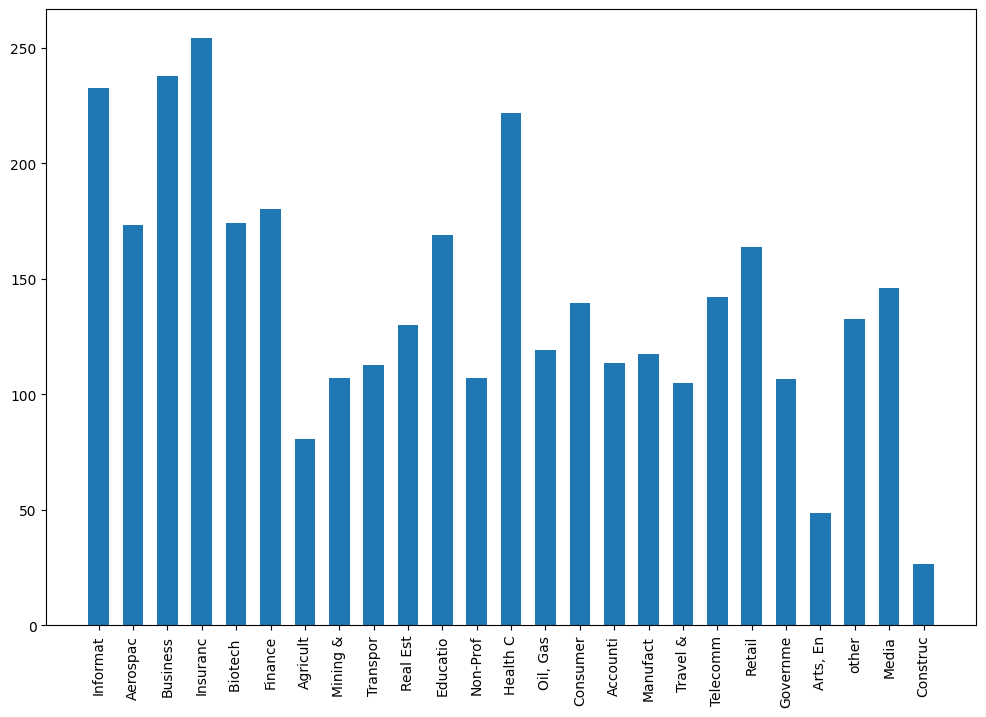

In [173]:
plot_bar('Sector','avg_salary')

In [174]:
for col in data.columns:
  if -1 in data[col].values:
    print(col)

Rating
age


## As Rating and Age has -1 in them , which means they are "na" for us , we will replace them with na and then impute na

In [175]:
data['Rating']=data['Rating'].replace({-1.:np.nan})
data['age']=data['age'].replace({-1:np.nan})

In [176]:
data.isna().sum()

Job Title             0
Rating               11
Type of ownership     0
Sector                0
hourly                0
employer_provided     0
min_salary            0
max_salary            0
avg_salary            0
job_state             0
same_state            0
age                  50
python_yn             0
R_yn                  0
spark                 0
aws                   0
excel                 0
dtype: int64

In [177]:
data['age'] = np.where(data['age'] > 80, 80, np.where(data['age']<8,8,data['age']))

In [178]:
data['age'].unique()

array([nan,  8.,  9., 10., 80., 24., 28., 17., 23., 14., 18., 21., 48.,
       46., 29., 38., 11., 78., 72., 16., 12., 36., 25., 19., 30., 27.,
       53., 39., 13., 62., 51., 33., 32., 52., 59., 43., 20., 66., 44.,
       73., 15., 54., 55., 47., 75., 26., 31., 40., 34., 68., 50., 35.,
       42., 41., 77., 56., 45., 58., 37., 22., 49., 69.])

In [179]:
data.head(5)

,Job Title,Rating,Type of ownership,Sector,hourly,employer_provided,min_salary,max_salary,avg_salary,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
373,Data Scientist,5.0,Private,Informat,0,1,150,160,155.0,DC,0,NaN,0,0,0,1,1
424,Data Scientist,5.0,Private,Aerospac,0,0,75,127,101.0,VA,0,8.0,1,0,0,0,0
45,Data Scientist,5.0,Private,Informat,0,1,150,160,155.0,DC,0,NaN,0,0,0,1,1
693,Senior Data Scientist,5.0,Private,Informat,0,1,120,140,130.0,MI,1,9.0,0,0,0,0,1
138,Data Engineer,5.0,Private,Informat,0,1,120,145,132.5,FL,0,8.0,0,0,0,0,0


In [180]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [181]:
y=data['avg_salary']
x=data.drop(['avg_salary'],axis=1)

In [182]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [183]:
x_train.isna().sum()

Job Title             0
Rating                9
Type of ownership     0
Sector                0
hourly                0
employer_provided     0
min_salary            0
max_salary            0
job_state             0
same_state            0
age                  42
python_yn             0
R_yn                  0
spark                 0
aws                   0
excel                 0
dtype: int64

In [184]:
ctrf=ColumnTransformer([
      ('tranf1',SimpleImputer(),['Rating','age']),
      ('tranf2',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=300),['Job Title','Type of ownership','Sector','job_state']),
],remainder='passthrough')

In [185]:
x_train=ctrf.fit_transform(x_train)
x_test=ctrf.transform(x_test)

In [186]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error

In [187]:
x_train.shape,x_test.shape

((593, 16), (149, 16))

In [188]:
rr=Ridge()
rr.fit(x_train,y_train)

Ridge()

In [189]:
has_nan = np.isnan(x_train).any()

if has_nan:
    print("The training set contains NaN values.")
else:
    print("The training set does not contain NaN values.")

The training set does not contain NaN values.


In [190]:
yhat=rr.predict(x_test)

In [191]:
print(f'R2 Score: {r2_score(y_test,yhat)}\n')
print(f'MSE: {mean_squared_error(y_test,yhat)}\n')

R2 Score: 0.9999999999984818

MSE: 2.51398134202189e-09



In [192]:
from sklearn.linear_model import Lasso

In [193]:
lesr=Lasso()
lesr.fit(x_train,y_train)

Lasso()

In [194]:
yhat_lr=lesr.predict(x_test)

In [195]:
print(f'R2 Score for Lasso Regression: {r2_score(y_test,yhat_lr)}\n')
print(f'MSE Score for Lasso Regression: {mean_squared_error(y_test,yhat_lr)}\n')

R2 Score for Lasso Regression: 0.9999991758982266

MSE Score for Lasso Regression: 0.0013645674158811725



# Conclusion
## Lasso and Ridge Regression both are performing well in this scenario

In [196]:
# [Job Title	Rating	Type of ownership	Sector	hourly	employer_provided	min_salary	max_salary	avg_salary	job_state	same_state	age	python_yn	R_yn	spark	aws	excel
#  ]
pred=rr.predict([[0,4.8,0,0,1,2,60,110,0,1,21,1,1,1,1,1]])

In [197]:
pred

array([0.51283642])